In [54]:
# Get data from matlab files
import h5py 
f = h5py.File('smwc1_778.mat','r')

import numpy as np
# get Y data (target classes) into array format
Y = f.get('Y')
Y = np.array(Y)
Y = Y.T

# get X data (features) into array format
X = f.get('score')
X = np.array(X) # For converting to numpy array
X = X.T
print('X is a %.3g row by %.3g col array' % (X.shape[0],X.shape[1]))
print('Y is a %.3g row by %.2g col array' % (Y.shape[0],Y.shape[1]))

X is a 778 row by 777 col array
Y is a 778 row by 1 col array


In [56]:
# Perform dimensionality reduction using PCA
from sklearn.decomposition import PCA
print('Performing PCA to 2 dimensions...')
pca = PCA(n_components=2)
Xhat = pca.fit_transform(X)
print('PCA completed. Xhat is a %.3g row by %.2g col array' % (Xhat.shape[0], Xhat.shape[1]))

Performing PCA to 2 dimensions...
PCA completed. Xhat is a 778 row by 2 col array


In [57]:
# Perform Isomap manifold learning
from sklearn import manifold
print('Performing isomap to 2 dimensions...')
isomap_X = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X)
print('Isomap completed. Isomap_X is a %.3g row by %.2g col array' % (isomap_X.shape[0], isomap_X.shape[1]))

Performing isomap to 2 dimensions...
Isomap completed. Isomap_X is a 778 row by 2 col array


In [58]:
# Perform tSNE
print('Performing t-SNE...')
tsne = manifold.TSNE(n_components=2, random_state=66, perplexity=50)
tSNE_X = tsne.fit_transform(X)
print('t-SNE complete. tSNE_X is a %.3g row by %.2g col array' % (tSNE_X.shape[0], tSNE_X.shape[1]))

Performing t-SNE...
t-SNE complete. tSNE_X is a 778 row by 2 col array


Evolution of data structure revealed by dimensionality reduction:


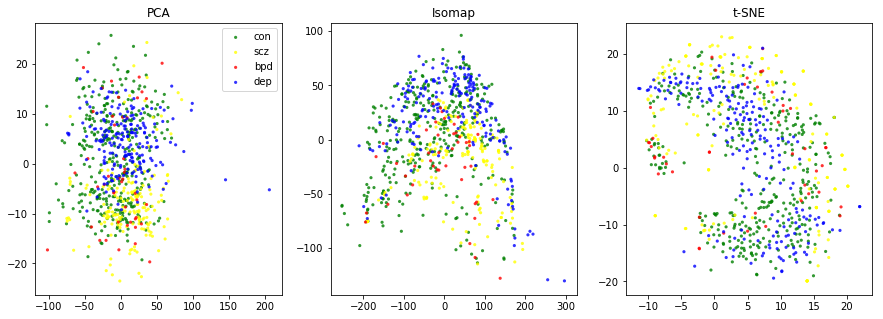

In [59]:
# Create scatter plots
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
groups = ("con","scz","bpd","dep")
colors = ("green","yellow","red","blue")

# Plot PCA results
ax = fig.add_subplot(1, 3, 1)
for group in groups:
    i = groups.index(group)
    groupIndex = np.where(Y == i)
    data = Xhat[groupIndex[0],:]
    x = data[:,0]
    y = data[:,1]
    ax.scatter(x, y, alpha = 0.8, c=colors[i], edgecolors='none', s=10, label=group)    
plt.legend(loc=1)
plt.title('PCA')
plt.axis('tight')

# Plot isomap results
ax = fig.add_subplot(1, 3, 2)
for group in groups:
    i = groups.index(group)
    groupIndex = np.where(Y == i)
    data = isomap_X[groupIndex[0],:]
    x = data[:,0]
    y = data[:,1]
    ax.scatter(x, y, alpha = 0.8, c=colors[i], edgecolors='none', s=10, label=group)    
plt.title('Isomap')
plt.axis('tight')

# Plot t-SNE results
ax = fig.add_subplot(1, 3, 3)
for group in groups:
    i = groups.index(group)
    groupIndex = np.where(Y == i)
    data = tSNE_X[groupIndex[0],:]
    x = data[:,0]
    y = data[:,1]
    ax.scatter(x, y, alpha = 0.8, c=colors[i], edgecolors='none', s=10, label=group)  
plt.title('t-SNE')
plt.axis('tight')

print('Evolution of data structure revealed by dimensionality reduction:')
plt.show()